In [1]:
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
sns.set()
from helpers import *
from sentiment_functions import *

2023-06-11 21:28:27.829588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-11 21:28:27.829608: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-06-11 21:28:31.417011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-11 21:28:31.417044: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06

# DATA

### NO_vax DATASET

In [2]:
df= pd.read_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/no_vax_sentiment.csv')

In [3]:
import ast
for index,row in df.iterrows(): 
    df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
    df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])

/tmp/ipykernel_26342/1314926012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
/tmp/ipykernel_26342/1314926012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])


In [4]:
df

,Title_en,Text_en,Authors,Date,Link,Newspaper,sentiment_title,list_sentences,list_labels,Country,porcentage_positive,porcentage_negative,porcentage_neutral,n_words
0,"Lanester. 150 people against the health pass, ...",For the fourth Saturday in a row and while the...,Glenn GILLET.,2021-08-07,https://www.ouest-france.fr/bretagne/lanester-...,Ouest France,Neutral,[For the fourth Saturday in a row and while th...,"[0, 1, 1, 2, 1, 1, 1]",France,0.142857,0.142857,0.714286,190
1,Covid-19. Six questions about these vaccines t...,Could this week's three strikes herald the beg...,Hervé HILLARD.,2020-11-19,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,Neutral,[Could this week's three strikes herald the be...,"[0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, ...",France,0.082569,0.165138,0.752294,1998
2,"VIEWPOINT. ""Vaccines: rather than moralising, ...","""For many months now, the medical and scientif...",error,2021-10-14,https://www.ouest-france.fr/sante/vaccin/point...,Ouest France,Neutral,"[""For many months now, the medical and scienti...","[1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, ...",France,0.071429,0.178571,0.750000,532
3,Israel. Beer offered to young people who get v...,How do you get young people to get vaccinated ...,avec agence,2021-02-26,https://www.ouest-france.fr/monde/israel/israe...,Ouest France,Neutral,[How do you get young people to get vaccinated...,"[1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0]",France,0.076923,0.307692,0.615385,236
4,"Health pass. ""The advantages of compulsory vac...",By extending the health pass to many social ac...,Carine JANIN.,2021-07-15,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,Neutral,[By extending the health pass to many social a...,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, ...",France,0.105263,0.236842,0.657895,569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,The vaccinated were not the only ones who died...,While research continues to develop an effecti...,ABC,2020-10-15,https://www.abc.es/sociedad/abci-vacunados-no-...,ABC,Negative,[While research continues to develop an effect...,"[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",Spain,0.000000,0.300000,0.700000,572
1782,Biden calls on companies to make vaccination c...,Vaccines have been in surplus in the US since ...,Javier Ansorena,2021-10-08,https://www.abc.es/sociedad/abci-biden-exige-e...,ABC,Neutral,[Vaccines have been in surplus in the US since...,"[1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...",Spain,0.041667,0.291667,0.666667,512
1783,Bots spreading anti-vaccine messages have litt...,"Regulate, intervene or let it go. The social m...",J.M. Sánchez,2020-10-06,https://www.abc.es/tecnologia/redes/abci-bots-...,ABC,Negative,"[Regulate, intervene or let it go., The social...","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...",Spain,0.000000,0.416667,0.583333,492
1784,"The six news items you need to know today, Fri...","[If you missed yesterday's six news items, you...",El Español,2021-08-27,https://www.abc.es/espana/noticias-ultima-hora...,ABC,Neutral,"[[If you missed yesterday's six news items, yo...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",Spain,0.000000,0.173913,0.826087,897


### DISINFORMATION DATASET

disinformation --> dataset with headlines and texts that contain disinformation words

disinformation_h --> dataset with headlines that contain disinformation words

disinformation_a --> dataset with articles that contain disinformation words

In [5]:
dis_words="disinformation|misinformation|hoaxes|rumours|theories"
disinformation=df[(df['Title_en'].str.contains(dis_words))|(df['Text_en'].str.contains(dis_words))]
disinformation_h=df[df['Title_en'].str.contains(dis_words)]
disinformation_a=df[df['Text_en'].str.contains(dis_words)]

df_sentences --> dataset of sentences with disinformation words

In [6]:
list_sentences=[]
list_labels=[]

for index,row in disinformation.iterrows(): 
    for sentence in disinformation['list_sentences'][index]:
        list_sentences.append(sentence)
    for label in disinformation['list_labels'][index]: 
        list_labels.append(label)

df_sentences=pd.DataFrame()
df_sentences['sentence']=list_sentences
df_sentences['label']=list_labels
df_sentences=df_sentences[df_sentences['sentence'].str.contains("disinformation|misinformation|hoaxes|rumours|theories")]

In [7]:
len(df_sentences)

805

### PROPORTION OF ARTICLES ABOUT DISINFORMATION FOR EACH COUNTRY

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


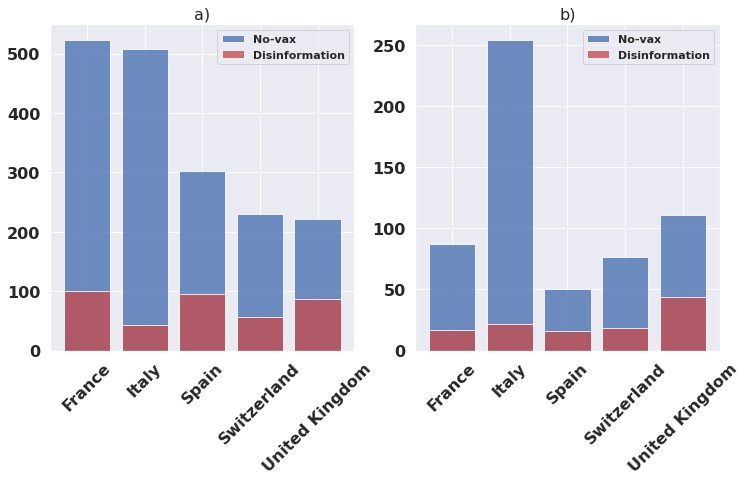

In [8]:
# Count the number of newspapers per country
newspapers_per_country = df.groupby('Country')['Newspaper'].nunique()
newspapers_per_country_dis = disinformation.groupby('Country')['Newspaper'].nunique()

# Group by country and count the number of articles per country
grouped_df = df.groupby('Country')['Text_en'].count()
grouped_df_dis = disinformation.groupby('Country')['Text_en'].count()

# Divide by the number of newspapers per country
grouped_df_norm = grouped_df / newspapers_per_country
grouped_df_dis_norm = grouped_df_dis / newspapers_per_country_dis

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Get the labels for the x-axis ticks
labels1 = grouped_df.index
labels2 = grouped_df_dis.index

# Plot the non-normalized data on the first axis
ax1.bar(labels1, grouped_df.values, alpha=0.8, color='b', tick_label=labels1)
ax1.bar(labels2, grouped_df_dis.values, alpha=0.8, color='r', tick_label=labels2)

# Plot the normalized data on the second axis
ax2.bar(labels1, grouped_df_norm.values, alpha=0.8, color='b', tick_label=labels1)
ax2.bar(labels2, grouped_df_dis_norm.values, alpha=0.8, color='r', tick_label=labels2)

# Set titles and labels
ax1.set_title('a)', fontsize=16)
ax2.set_title('b)', fontsize=16)
# ax1.set_xlabel('Country', fontsize=14)
# ax2.set_xlabel('Country', fontsize=14)
# ax1.set_ylabel('Count', fontsize=14)
# ax2.set_ylabel('Count', fontsize=14)

# Set the fontsize of xticks and yticks
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Set the x-axis labels to be rotated for better visibility
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Add the legend
ax1.legend(['No-vax', 'Disinformation'])
ax2.legend(['No-vax', 'Disinformation'])

# Set the fontsize for the legend
# leg = ax1.legend(fontsize=12)
# leg.set_title('Category', prop={'size':14})

# Show the plot
plt.show()



# SEMANTIC SIMILARITY WITH WORD-EMBEDDINGS

The idea behind the use of word-embedding is to try to identify semantic relationships between words in articles. In this way, we aim to identify associations between different aspects of the no-vax movement

In [9]:
# Import necessary libraries
from gensim.models import Word2Vec
from nltk import word_tokenize

# Create a list of lists, where each sublist is a list of tokens from a text
tokenized_texts = [word_tokenize(text) for text in df['Text_en']]

# Train a word2vec model on the tokenized texts
model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)


In [10]:
model.wv.most_similar("disinformation")

[('misinformation', 0.8625677227973938),
 ('rumours', 0.8431568741798401),
 ('misleading', 0.7967899441719055),
 ('false', 0.7903295159339905),
 ('hoaxes', 0.7893953323364258),
 ('5G', 0.7567858099937439),
 ('theories', 0.7537815570831299),
 ('emotions', 0.7517730593681335),
 ('dissemination', 0.7482905983924866),
 ('propaganda', 0.7448548078536987)]

In [11]:
model.wv.most_similar("misinformation")

[('disinformation', 0.8625677227973938),
 ('rumours', 0.8424103260040283),
 ('false', 0.8194932341575623),
 ('theories', 0.7956855893135071),
 ('content', 0.7703547477722168),
 ('conspiracy', 0.7655466794967651),
 ('misleading', 0.7471118569374084),
 ('hoaxes', 0.722570538520813),
 ('spreading', 0.7162219285964966),
 ('information', 0.7134981155395508)]

In [12]:
model.wv.most_similar("no-vax")

[('no-vaccine', 0.8250439763069153),
 ('anti-vax', 0.7814884781837463),
 ('anti-vaxers', 0.7765858769416809),
 ("'yes", 0.7734195590019226),
 ('fringe', 0.7731153964996338),
 ('selfish', 0.7720803022384644),
 ('right-wing', 0.7702186703681946),
 ('activists', 0.7700148820877075),
 ('dissident', 0.7698465585708618),
 ('positions', 0.7676230072975159)]

In [13]:
#similarity between 2 words
model.wv.similarity("disinformation", "no-vax")

0.5515366

In [14]:
model.wv.doesnt_match(["vaccine", "no-vax", "disinformation"])

'vaccine'

In [17]:
model

In [18]:
model.save("word2vec_model_no_vax.bin")

In [21]:
model = Word2Vec.load("word2vec_model_no_vax.bin")

# DISINFORMATION 1plot

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


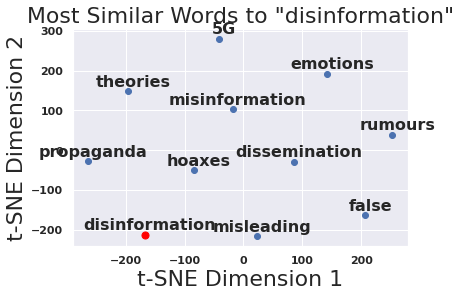

In [22]:
# Set the target word and find the most similar words
target_word = 'disinformation'
similar_words = model2.wv.most_similar(target_word)

# Extract the word vectors for the similar words and the target word
vectors = np.array([model2.wv[word] for word, _ in similar_words] + [model2.wv[target_word]])

# Apply t-SNE to the word vectors
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word vectors using a scatter plot
plt.scatter(vectors_tsne[:-1, 0], vectors_tsne[:-1, 1])
plt.scatter(vectors_tsne[-1, 0], vectors_tsne[-1, 1], color='red', s=50) # Plot the target word in red

# Add labels for the similar words
for i, word in enumerate(similar_words):
    plt.annotate(word[0], xy=vectors_tsne[i], xytext=(5, 2), textcoords='offset points', ha='center', va='bottom')

# Add a label for the target word
plt.annotate(target_word, xy=vectors_tsne[-1], xytext=(5, 2), textcoords='offset points', ha='center', va='bottom')

# Add axis labels and a title
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Most Similar Words to "{}"'.format(target_word))

plt.show()


### DISINFORMATION AND NO-VAX 2 plots

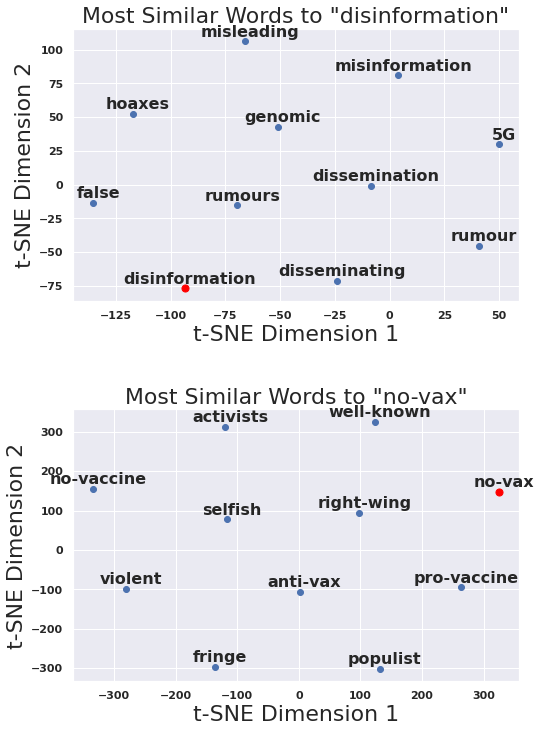

In [15]:
# Set the target words and find the most similar words for each
target_words = ['disinformation', 'no-vax']
similar_words_list = [model.wv.most_similar(word) for word in target_words]

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Loop through each subplot
for i, ax in enumerate(axs):

    # Extract the word vectors for the similar words and the target word
    target_word = target_words[i]
    similar_words = similar_words_list[i]
    vectors = np.array([model.wv[word] for word, _ in similar_words] + [model.wv[target_word]])

    # Apply t-SNE to the word vectors
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
    vectors_tsne = tsne.fit_transform(vectors)

    # Plot the word vectors using a scatter plot
    ax.scatter(vectors_tsne[:-1, 0], vectors_tsne[:-1, 1])
    ax.scatter(vectors_tsne[-1, 0], vectors_tsne[-1, 1], color='red', s=50) # Plot the target word in red

    # Add labels for the similar words
    for j, word in enumerate(similar_words):
        ax.annotate(word[0], xy=vectors_tsne[j], xytext=(5, 2), textcoords='offset points', ha='center', va='bottom')

    # Add a label for the target word
    ax.annotate(target_word, xy=vectors_tsne[-1], xytext=(5, 2), textcoords='offset points', ha='center', va='bottom')

    # Add axis labels and a title
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_title('Most Similar Words to "{}"'.format(target_word))

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

plt.show()


In [16]:
# BIGRAMS, for isntance Bill Gates

In [17]:
from gensim.models import Phrases

# Create a Phrases object and train it on the tokenized texts
bigram = Phrases(tokenized_texts)

# Apply the Phrases object to the tokenized texts to detect multi-word phrases
phrased_texts = [bigram[text] for text in tokenized_texts]

# Train a word2vec model on the phrased texts
model_bigram = Word2Vec(phrased_texts, vector_size=100, window=5, min_count=1, workers=4)

In [18]:
model_bigram.wv.most_similar("Bill_Gates")

[('rhetoric', 0.8885186314582825),
 ('Microsoft_founder', 0.885780930519104),
 ('accusations', 0.8763747215270996),
 ('fascism', 0.8750105500221252),
 ('theory', 0.8706353902816772),
 ('Williamson', 0.8682308793067932),
 ('theories', 0.8659906983375549),
 ('Louis_Fouché', 0.865475058555603),
 ('bishop', 0.863983690738678),
 ('Gates', 0.8638827204704285)]

In [19]:
model_bigram.wv.most_similar("Bolsonaro")

[('Louis_Fouché', 0.9234338402748108),
 ('Francis', 0.9195771813392639),
 ('magistrate', 0.9116830825805664),
 ('Labours', 0.9097590446472168),
 ('Michael_Gove', 0.9090747237205505),
 ('FranceSoir', 0.9088420271873474),
 ('Didier_Raoult', 0.908539891242981),
 ('Qr_code', 0.9074652194976807),
 ('Abbott', 0.9045817852020264),
 ('Scotlands', 0.9033341407775879)]

# SENTIMENT ANALYSIS DISINFORMATION CONTENT

we used the results of sentiment analysis at sentence level, to understand the predominant tone in the sentences about disinformation, and to contrast whether the traditional press has used a more critical tone against disinformation than social media

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Eva González vindicates the role of vaccines in overcoming the pandemic: "Science saves lives".
UK records highest daily rise in cases since pandemic began
Elizabeth and the queens of London championed medicine in the 18th century
SAMPLES OF NEGATIVE HEADLINES
Chef’s parents and brother die from Covid within days of each other after rejecting vaccines
Regional elections: where do the anti-vaccine, citizen-based "One our world" lists come from?
Report finds up to 40 videos discouraging Covid vaccination on major social media sites


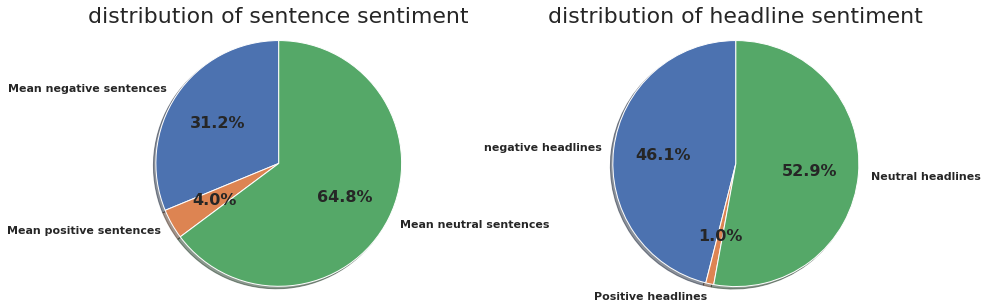

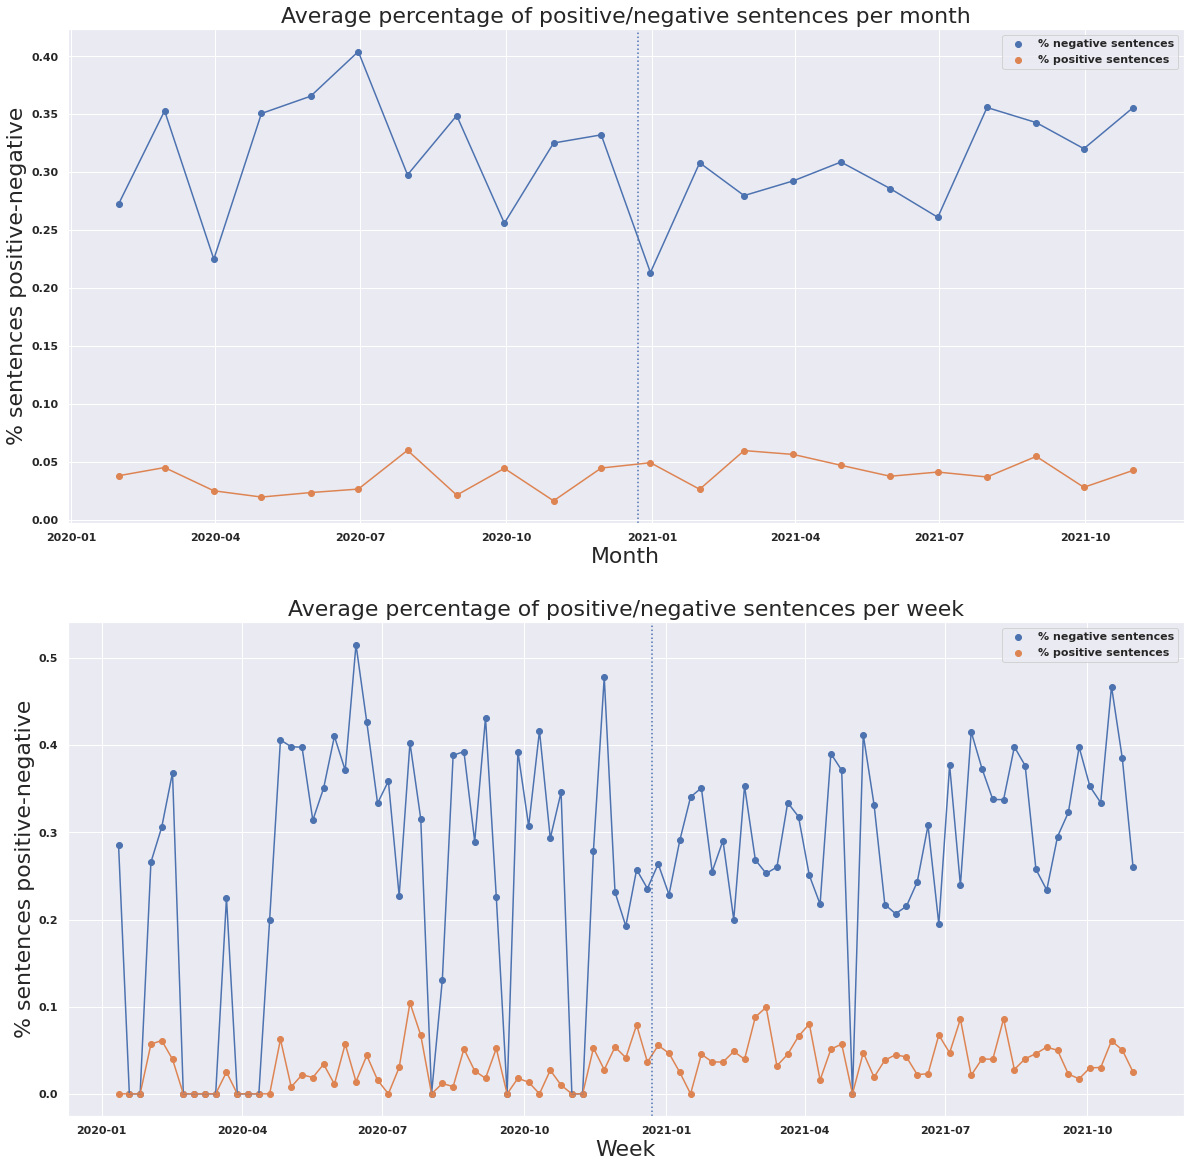

In [8]:
sentiment_analysis(disinformation,'2020-12-23')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE SENTENCES
No samples of positive sentences
SAMPLES OF NEGATIVE SENTENCES
The Pan American Health Organisation (PAHO) warned on Wednesday of the effect that misinformation, especially rumours and conspiracy theories, could have on the vaccination process and the general response to the coronavirus pandemic in the Americas.
"When people cannot easily access reliable information about vaccines and when there is a lot of mistrust towards people and institutions linked to vaccines, misinformation fills this void very quickly" and gradually instills a growing mistrust of vaccines, First Draft said in a study on Thursday.


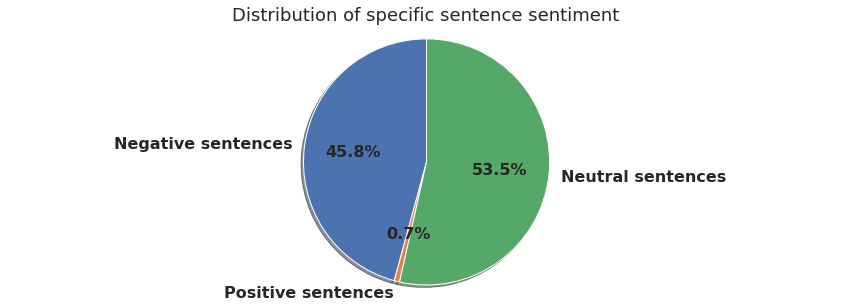

In [9]:
#HEADLINE LEVEL
sentences_with_word(disinformation_h,'disinformation|misinformation|hoaxes|rumours|theories')

In [22]:
#sentence level

SAMPLES OF POSITIVE SENTENCES
From oral rumours, we have moved on to the much more effective sounding board that is the internet, where all kinds of information capable of influencing behaviour compete.
"I spend a lot of time trying to combat misinformation and I decided to post both because Im so proud of Phoebe and because its important to show science will win.”
SAMPLES OF NEGATIVE SENTENCES
"Content that falsely claims that approved vaccines are dangerous and cause chronic health effects, that claims that vaccines do not reduce disease transmission or disease occurrence, or that contains misinformation about substances in vaccines will be removed," Youtube said in a statement.
He regrets that his family fell into a "fear" of the vaccine because of conspiracy theories.


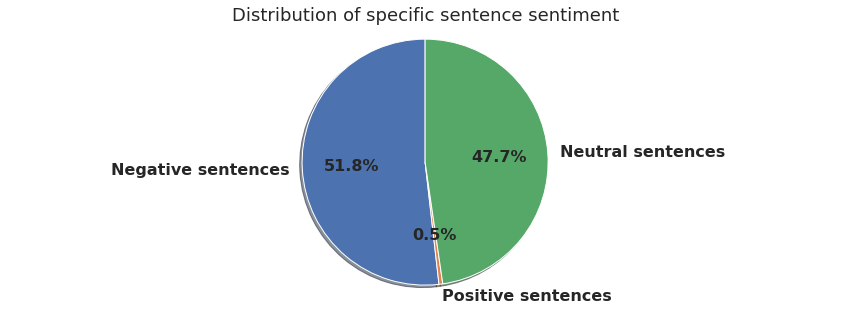

In [10]:
sentences_with_word(disinformation_a,'disinformation|misinformation|hoaxes|rumours|theories')

# KEYWORD ASSOCIATION

This experiment aimed to reveal what other words tend to appear near the 'disinformation' keyword.  This is useful for discovering patterns and trends in the data, and could be used to extract insights and generate hypotheses about the topics and themes present in the text

In [24]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def co_occurrence_matrix(sentences, keyword, window_size):
    # Remove punctuation marks from the sentences
    sentences = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences]

    # Tokenize the sentences
    sentences = [word_tokenize(sentence) for sentence in sentences]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    sentences = [[word for word in sentence if word.lower() not in stop_words] for sentence in sentences]

    # Create an empty co-occurrence matrix
    co_occurrence = {}

    # Iterate over each sentence
    for sentence in sentences:
        try:
            # Find the index of the keyword in the sentence
            keyword_index = sentence.index(keyword)

            # Extract the words within the window size of the keyword
            window = sentence[max(0, keyword_index - window_size):keyword_index + window_size + 1]

            # Iterate over each word in the window
            for word in window:
                # Skip the keyword itself
                if word == keyword:
                    continue

                # Increment the count of the word in the co-occurrence matrix
                if word in co_occurrence:
                    co_occurrence[word] += 1
                else:
                    co_occurrence[word] = 1
        except ValueError:
            # The keyword was not found in the sentence, so skip it
            continue

    # Return the co-occurrence matrix
    return co_occurrence



# Example usage
# sentences = ['Disinformation about vaccines is spreading on social media', 'Misinformation about the safety of vaccines is a growing concern']
keyword = 'disinformation'
window_size = 3
co_occurrence = co_occurrence_matrix(df_sentences.sentence.values.tolist(), keyword, window_size)
# print(co_occurrence)

[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from wordcloud import WordCloud

def plot_wordcloud(co_occurrence):
    # Create a word cloud from the co-occurrence matrix
    wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate_from_frequencies(co_occurrence)

    # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

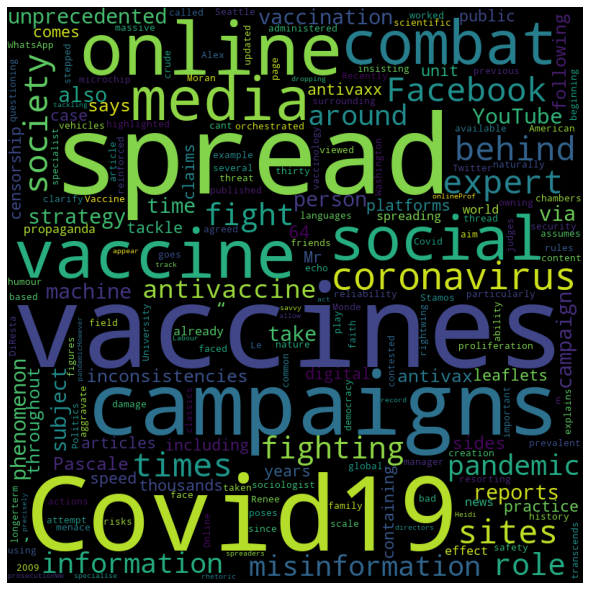

In [26]:
plot_wordcloud(co_occurrence)

# NAMED ENTITY RECOGNITION

We used NER to identify and extract named entities (people, organizations, locations, etc.) mentioned in the articles. This helped identify key actors and groups involved in the no-vax movement, and examine their role in the dissemination of disinformation

In [27]:
import spacy
from collections import Counter

# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to extract Named Entities of a specific type from text
def extract_named_entities_by_type(text, entity_type):
    doc = nlp(text)
    named_entities = []
    for entity in doc.ents:
        if entity.label_ == entity_type and entity.text !="Covid":
            named_entities.append(entity.text)
    return named_entities




/tmp/ipykernel_23817/1361004264.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90, fontsize=18)


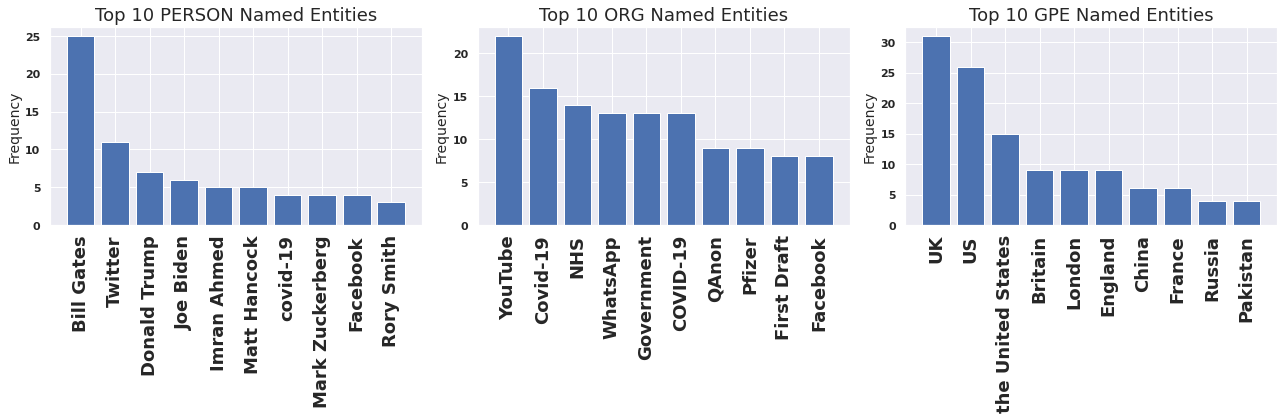

In [28]:
# Define a function to plot the top N most common Named Entities
def plot_top_named_entities(named_entity_counts, n, title, ax):
    most_common = named_entity_counts.most_common(n)
    x = [pair[0] for pair in most_common]
    y = [pair[1] for pair in most_common]
    ax.bar(x, y)
    ax.set_xticklabels(x, rotation=90, fontsize=18)
   
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency',fontsize=14)
sns.set()
# Create subplots for each entity type
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
entity_types = ['PERSON', 'ORG', 'GPE']
axes = [ax1, ax2, ax3]
for entity_type, ax in zip(entity_types, axes):
    named_entities = df_sentences['sentence'].apply(lambda x: extract_named_entities_by_type(x, entity_type))
    named_entities = [entity for sublist in named_entities for entity in sublist]
    named_entity_counts = Counter(named_entities)
    plot_top_named_entities(named_entity_counts, 10, f'Top 10 {entity_type} Named Entities', ax)

plt.tight_layout()
plt.show()

# SEMANTIC NETWORK OF NAMED ENTITIES

We created a semantic network of named entities, in order to understand the relationship between entities.

#### DATASET OF SENTENCES THAT CONTAINS JUST THE WORD DISINFORMATION: df_sentences_jdis

In [29]:
df_just_disinformation=df[df['Text_en'].str.contains("disinformation")]
list_sentences=[]
list_labels=[]

for index,row in df_just_disinformation.iterrows(): 
    for sentence in df_just_disinformation['list_sentences'][index]:
        list_sentences.append(sentence)
    for label in df_just_disinformation['list_labels'][index]: 
        list_labels.append(label)

df_sentences_jdis=pd.DataFrame()
df_sentences_jdis['sentence']=list_sentences
df_sentences_jdis['label']=list_labels
df_sentences_jdis=df_sentences_jdis[df_sentences_jdis['sentence'].str.contains("disinformation")]

In [30]:
len(df_sentences_jdis)

105

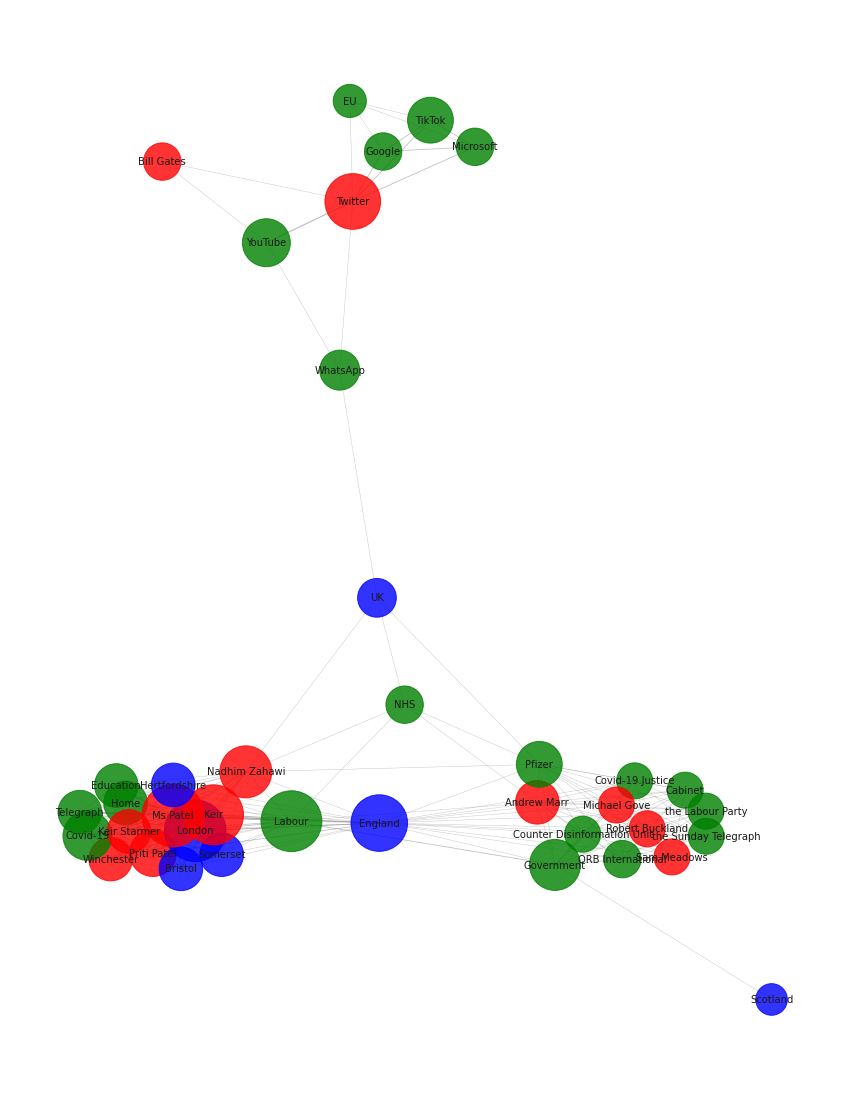

In [31]:
######TAKING JUST THE SENTENCES ABOUT DISINFORMATION
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English language model in SpaCy
nlp = spacy.load("en_core_web_sm")

# Define a function to extract named entities from a sentence
# def extract_entities(sentence):
#     doc = nlp(sentence)
#     return [(ent.text, ent.label_) for ent in doc.ents]
def extract_entities(sentence):
    doc = nlp(sentence)
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE"]]

# Example sentences
sentences = df_sentences_jdis.sentence

# Create a graph with weighted edges
graph = nx.Graph()
for sentence in sentences:
    entities = extract_entities(sentence)
    for entity in entities:
        entity_text, entity_label = entity
        if entity_text !="Covid":
            if not graph.has_node(entity_text):
                graph.add_node(entity_text, size=1, label=entity_label)
            else:
                graph.nodes[entity_text]["size"] += 1
            for other_entity in entities:
                other_entity_text, other_entity_label = other_entity
                if entity_text != other_entity_text:
                    if not graph.has_node(other_entity_text):
                        graph.add_node(other_entity_text, size=1, label=other_entity_label)
                    else:
                        graph.nodes[other_entity_text]["size"] += 1
                    if not graph.has_edge(entity_text, other_entity_text):
                        graph.add_edge(entity_text, other_entity_text, weight=1)
                    else:
                        graph[entity_text][other_entity_text]["weight"] += 1

# Compute the frequency of each node
freq = Counter()
for node, data in graph.nodes(data=True):
    freq[node] = data['size']

# Filter the nodes based on the frequency
min_freq = 10
relevant_nodes = [node for node, f in freq.items() if f >= min_freq]
subgraph = graph.subgraph(relevant_nodes)

# Define the layout of the nodes
pos = nx.spring_layout(subgraph, k=0.3)

# Set node colors based on entity type
colors = {"PERSON": "red", "ORG": "green", "GPE": "blue"}
node_colors = [colors.get(subgraph.nodes[n]["label"], "gray") for n in subgraph.nodes()]

# Set edge thicknesses based on weight
edge_widths = [subgraph[u][v]["weight"]*0.2 for u,v in subgraph.edges()]

plt.figure(figsize=(15, 20))
# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(subgraph, pos, node_size=[subgraph.nodes[n]["size"]*100 for n in subgraph.nodes()], alpha=0.8, node_color=node_colors)
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, alpha=0.5, edge_color="gray")


# Add labels to the nodes
labels = {}
for node in subgraph.nodes():
    labels[node] = node
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_family="sans-serif")

# Show the graph

plt.axis("off")
plt.show()


In [32]:
######TAKING JUST THE SENTENCES ABOUT  MISINFORMATION
df_mis=df[df['Text_en'].str.contains("misinformation")]
list_sentences=[]
list_labels=[]

for index,row in df_mis.iterrows(): 
    for sentence in df_mis['list_sentences'][index]:
        list_sentences.append(sentence)
    for label in df_mis['list_labels'][index]: 
        list_labels.append(label)

df_sentences_jdis_mis=pd.DataFrame()
df_sentences_jdis_mis['sentence']=list_sentences
df_sentences_jdis_mis['label']=list_labels
df_sentences_jdis_mis=df_sentences_jdis_mis[df_sentences_jdis_mis['sentence'].str.contains("misinformation")]

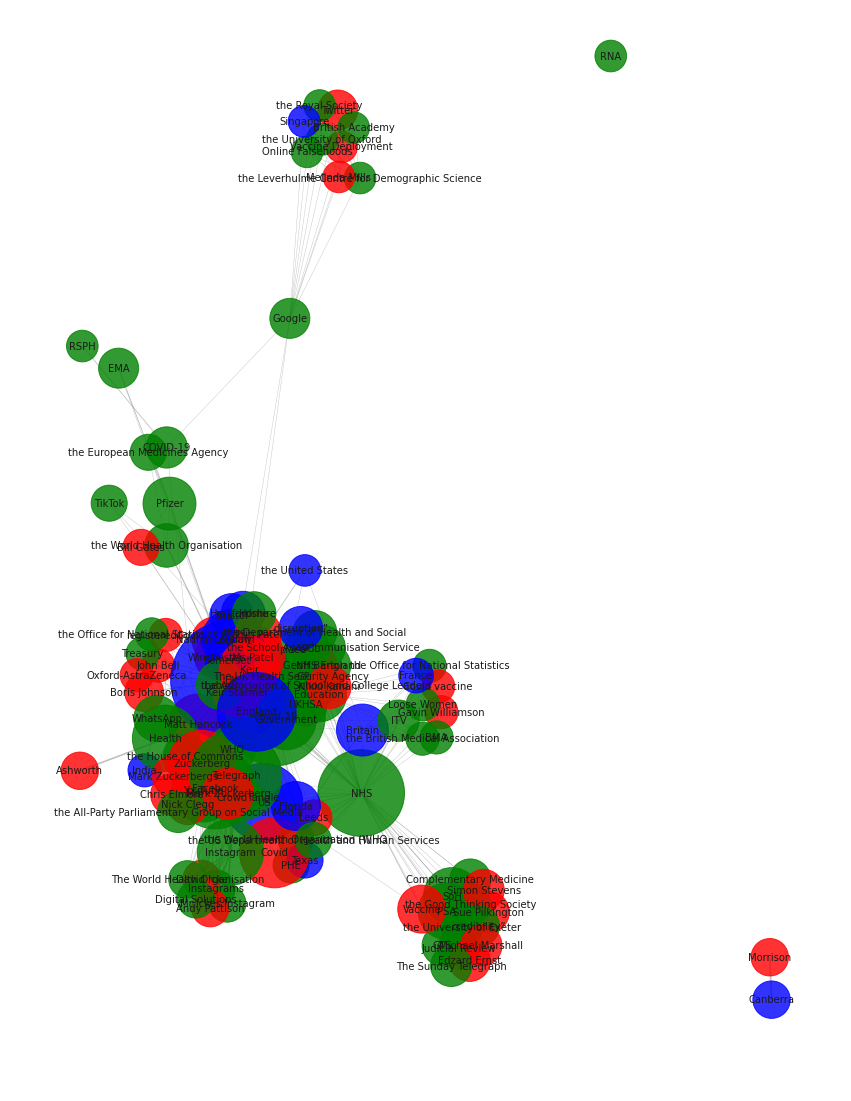

In [33]:
######TAKING JUST THE SENTENCES ABOUT MISINFORMATION
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English language model in SpaCy
nlp = spacy.load("en_core_web_sm")

# Define a function to extract named entities from a sentence
# def extract_entities(sentence):
#     doc = nlp(sentence)
#     return [(ent.text, ent.label_) for ent in doc.ents]
def extract_entities(sentence):
    doc = nlp(sentence)
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE"]]

# Example sentences
sentences = df_sentences_jdis_mis.sentence

# Create a graph with weighted edges
graph = nx.Graph()
for sentence in sentences:
    entities = extract_entities(sentence)
    for entity in entities:
        entity_text, entity_label = entity
        if entity_text !="Covid":
            if not graph.has_node(entity_text):
                graph.add_node(entity_text, size=1, label=entity_label)
            else:
                graph.nodes[entity_text]["size"] += 1
            for other_entity in entities:
                other_entity_text, other_entity_label = other_entity
                if entity_text != other_entity_text:
                    if not graph.has_node(other_entity_text):
                        graph.add_node(other_entity_text, size=1, label=other_entity_label)
                    else:
                        graph.nodes[other_entity_text]["size"] += 1
                    if not graph.has_edge(entity_text, other_entity_text):
                        graph.add_edge(entity_text, other_entity_text, weight=1)
                    else:
                        graph[entity_text][other_entity_text]["weight"] += 1

# Compute the frequency of each node
freq = Counter()
for node, data in graph.nodes(data=True):
    freq[node] = data['size']

# Filter the nodes based on the frequency
min_freq = 10
relevant_nodes = [node for node, f in freq.items() if f >= min_freq]
subgraph = graph.subgraph(relevant_nodes)

# Define the layout of the nodes
pos = nx.spring_layout(subgraph, k=0.3)

# Set node colors based on entity type
colors = {"PERSON": "red", "ORG": "green", "GPE": "blue"}
node_colors = [colors.get(subgraph.nodes[n]["label"], "gray") for n in subgraph.nodes()]

# Set edge thicknesses based on weight
edge_widths = [subgraph[u][v]["weight"]*0.2 for u,v in subgraph.edges()]

plt.figure(figsize=(15, 20))
# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(subgraph, pos, node_size=[subgraph.nodes[n]["size"]*100 for n in subgraph.nodes()], alpha=0.8, node_color=node_colors)
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, alpha=0.5, edge_color="gray")


# Add labels to the nodes
labels = {}
for node in subgraph.nodes():
    labels[node] = node
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_family="sans-serif")

# Show the graph

plt.axis("off")
plt.show()


#### Sentences with disinformation words: disinformation, misinformation,hoaxes,rumours and theories

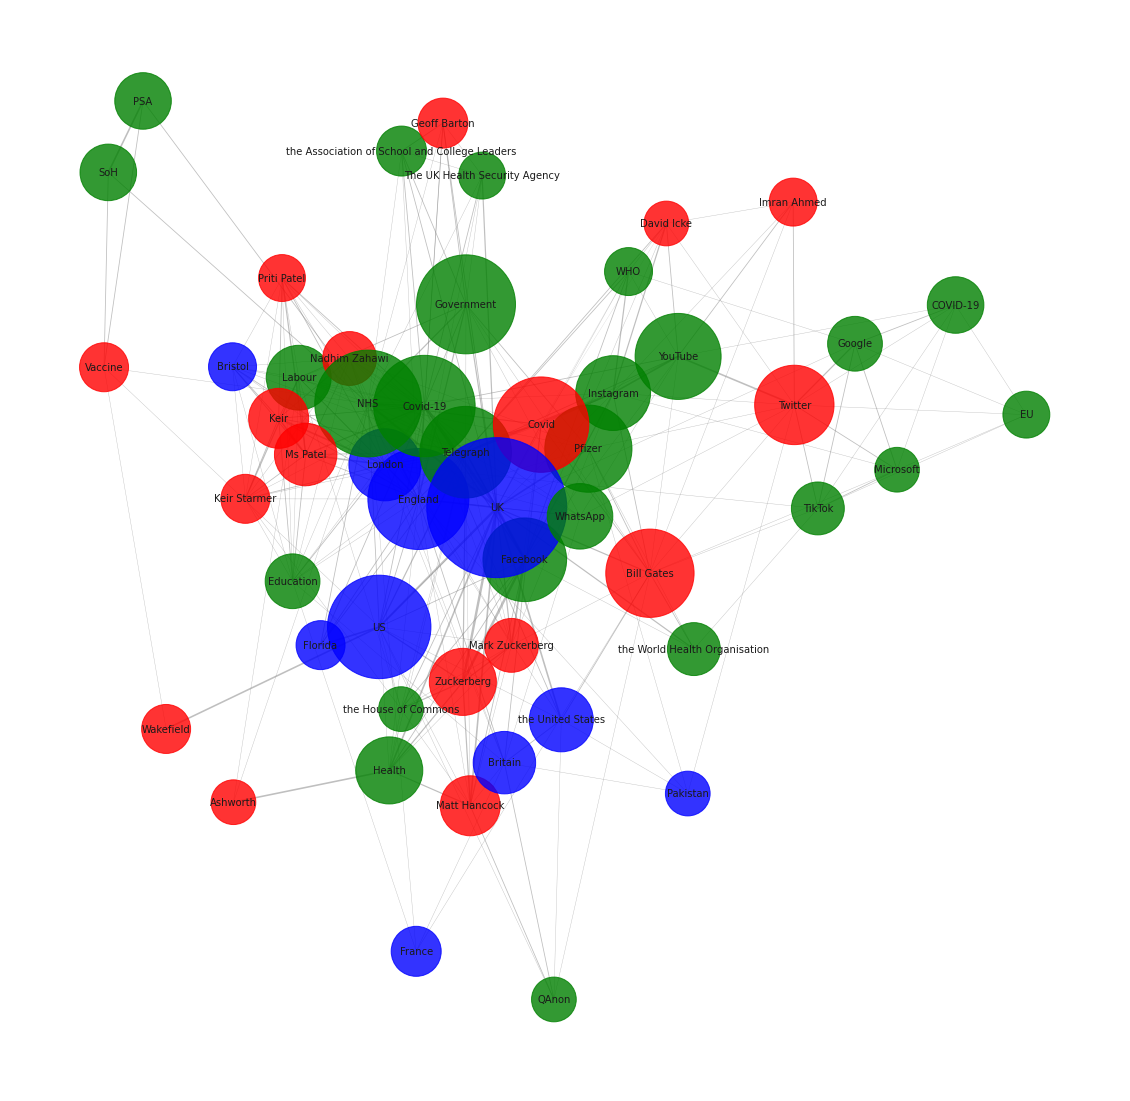

In [34]:
######TAKING THE 805 senteneces
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the pre-trained English language model in SpaCy
nlp = spacy.load("en_core_web_sm")

# Define a function to extract named entities from a sentence

def extract_entities(sentence):
    doc = nlp(sentence)
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE"]]

# Example sentences
sentences = df_sentences.sentence

# Create a graph with weighted edges
graph = nx.Graph()
for sentence in sentences:
    entities = extract_entities(sentence)
    for entity in entities:
        entity_text, entity_label = entity
        if entity_text !="Covid":
            if not graph.has_node(entity_text):
                graph.add_node(entity_text, size=1, label=entity_label)
            else:
                graph.nodes[entity_text]["size"] += 1
            for other_entity in entities:
                other_entity_text, other_entity_label = other_entity
                if entity_text != other_entity_text:
                    if not graph.has_node(other_entity_text):
                        graph.add_node(other_entity_text, size=1, label=other_entity_label)
                    else:
                        graph.nodes[other_entity_text]["size"] += 1
                    if not graph.has_edge(entity_text, other_entity_text):
                        graph.add_edge(entity_text, other_entity_text, weight=1)
                    else:
                        graph[entity_text][other_entity_text]["weight"] += 1

# Compute the frequency of each node
freq = Counter()
for node, data in graph.nodes(data=True):
    freq[node] = data['size']

# Filter the nodes based on the frequency
min_freq = 20
relevant_nodes = [node for node, f in freq.items() if f >= min_freq]
subgraph = graph.subgraph(relevant_nodes)

# Define the layout of the nodes
pos = nx.spring_layout(subgraph, k=0.3)

# Set node colors based on entity type
colors = {"PERSON": "red", "ORG": "green", "GPE": "blue"}
node_colors = [colors.get(subgraph.nodes[n]["label"], "gray") for n in subgraph.nodes()]

# Set edge thicknesses based on weight
edge_widths = [subgraph[u][v]["weight"]*0.2 for u,v in subgraph.edges()]

plt.figure(figsize=(20, 20))
# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(subgraph, pos, node_size=[subgraph.nodes[n]["size"]*100 for n in subgraph.nodes()], alpha=0.8, node_color=node_colors)
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, alpha=0.5, edge_color="gray")


# Add labels to the nodes
labels = {}
for node in subgraph.nodes():
    labels[node] = node
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_family="sans-serif")

# Show the graph

plt.axis("off")
plt.show()
